<a href="https://colab.research.google.com/github/sharon8y/SquareTracking/blob/main/4_1_Drone_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please build a model using yolov8. I have a dataset of images where each image has a corresponding label file written in a yolov8 format.
   - For each image:
     - Extract the drone's location from the label file (yolov8 format).
     - Find the bounding box of the drone in the image.
     - Create a new image by cropping the bounding box.
     - Convert the cropped image to black and white.
     - Resize the image to a quadratic form (e.g., 28x28) using Keras library.
     - Save the processed image in a list along with the appropriate label (drone).

     - Repeat the above steps, but this time take a random crop of the image with the same quadratic resolution.
     - Save the random cropped image in a separate list along with the appropriate label (not a drone).


In [ ]:
# Install YOLOv5
!pip install yolov5

import os
import cv2
import numpy as np
from PIL import Image
import random
from tensorflow.keras.preprocessing import image as keras_image

In [ ]:
from google.colab import files

# Define a function to save images into a folder in Colab temporary storage
def save_images_to_folder(processed_images, folder_name):
    folder_path = '/content/' + folder_name + '/'
    os.makedirs(folder_path, exist_ok=True)

    for i, (img, label) in enumerate(processed_images):
        filename = f"{label}_{i}.jpg"  # Naming convention for saved images
        file_path = os.path.join(folder_path, filename)
        cv2.imwrite(file_path, img * 255)  # Multiplying by 255 to convert back to 0-255 range for saving

    # Zip the folder to download
    zip_path = folder_path + folder_name + '.zip'
    !zip -r $zip_path $folder_path

    # Download the zip file
    files.download(zip_path)

# Modify the process_images function to save images into a folder
def process_images_save_to_folder(image_folder, label_folder, quadratic_size, save_folder_name):
    processed_images_drone = []
    processed_images_not_drone = []

    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):  # Assuming images are in jpg format
            image_path = os.path.join(image_folder, filename)
            label_path = os.path.join(label_folder, filename.replace('.jpg', '.txt'))

            # Read the image
            img = cv2.imread(image_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Process YOLOv8 format labels to extract drone's location
            with open(label_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    # Parse YOLOv8 label format (class x_center y_center width height)
                    class_id, x_center, y_center, width, height = map(float, line.split())

                    # Calculate bounding box coordinates
                    x1 = int((x_center - width / 2) * img.shape[1])
                    y1 = int((y_center - height / 2) * img.shape[0])
                    x2 = int((x_center + width / 2) * img.shape[1])
                    y2 = int((y_center + height / 2) * img.shape[0])

                    # Crop the drone image
                    drone_img = img_rgb[y1:y2, x1:x2]

                    # Convert cropped image to black and white
                    drone_img_bw = cv2.cvtColor(drone_img, cv2.COLOR_RGB2GRAY)

                    # Resize to quadratic form
                    drone_img_resized = cv2.resize(drone_img_bw, (quadratic_size, quadratic_size))

                    # Convert to numpy array and normalize
                    drone_img_resized = np.array(drone_img_resized) / 255.0

                    # Save processed image with appropriate label
                    processed_images_drone.append((drone_img_resized, 1))  # Drone label is 1

                    # Random crop of the image for negative class (not a drone)
                    random_x = random.randint(0, img.shape[1] - quadratic_size)
                    random_y = random.randint(0, img.shape[0] - quadratic_size)
                    not_drone_img = img_rgb[random_y:random_y+quadratic_size, random_x:random_x+quadratic_size]

                    # Convert random cropped image to black and white
                    not_drone_img_bw = cv2.cvtColor(not_drone_img, cv2.COLOR_RGB2GRAY)

                    # Resize to quadratic form
                    not_drone_img_resized = cv2.resize(not_drone_img_bw, (quadratic_size, quadratic_size))

                    # Convert to numpy array and normalize
                    not_drone_img_resized = np.array(not_drone_img_resized) / 255.0

                    # Save random cropped image with appropriate label
                    processed_images_not_drone.append((not_drone_img_resized, 0))  # Not a drone label is 0

    # Save processed images into respective folders
    save_images_to_folder(processed_images_drone, f"{save_folder_name}_drones")
    save_images_to_folder(processed_images_not_drone, f"{save_folder_name}_not_drones")

# Example usage
image_folder_path = '/content/drive/MyDrive/Colab_Notebooks/HW_4_Drones/Images_Gelem/drone_data'
label_folder_path = '/content/drive/MyDrive/Colab_Notebooks/HW_4_Drones/Images_Gelem/drone_data'
quadratic_size = 28
save_folder_name = 'processed_images'

process_images_save_to_folder(image_folder_path, label_folder_path, quadratic_size, save_folder_name)


in a separate google colab cell, please write only the code lines necessary to print 10 random images with their labels from the new processed folder.

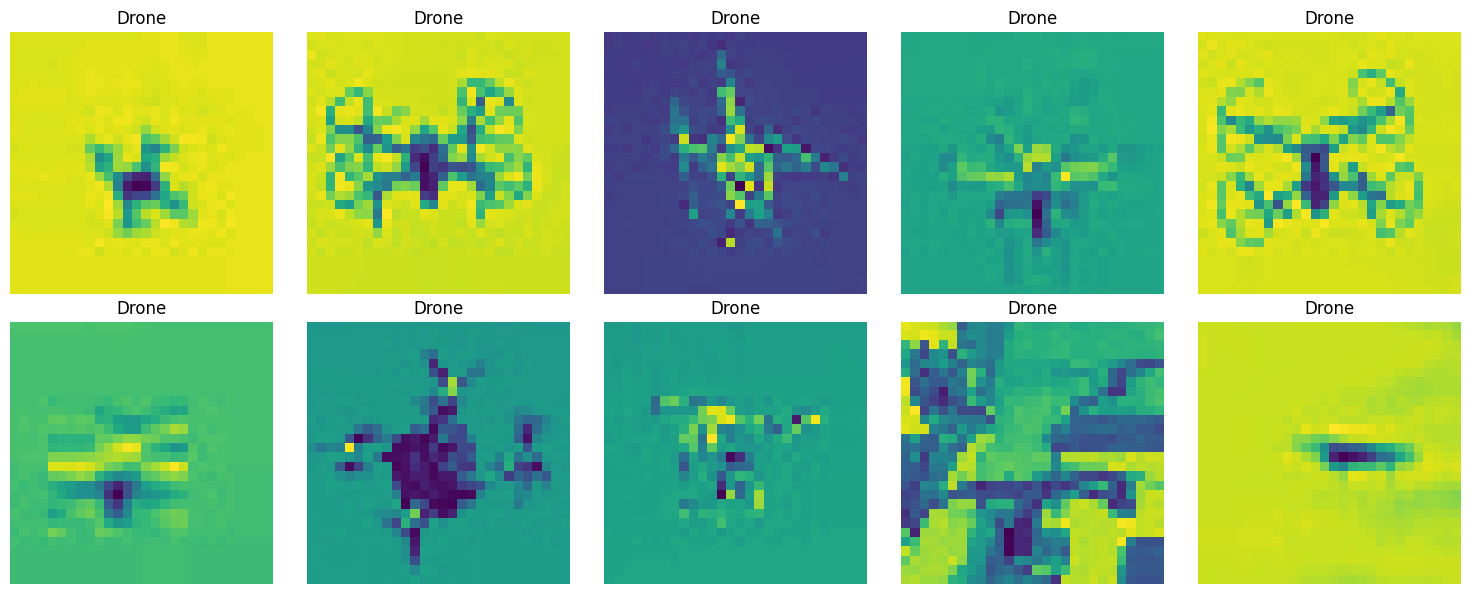

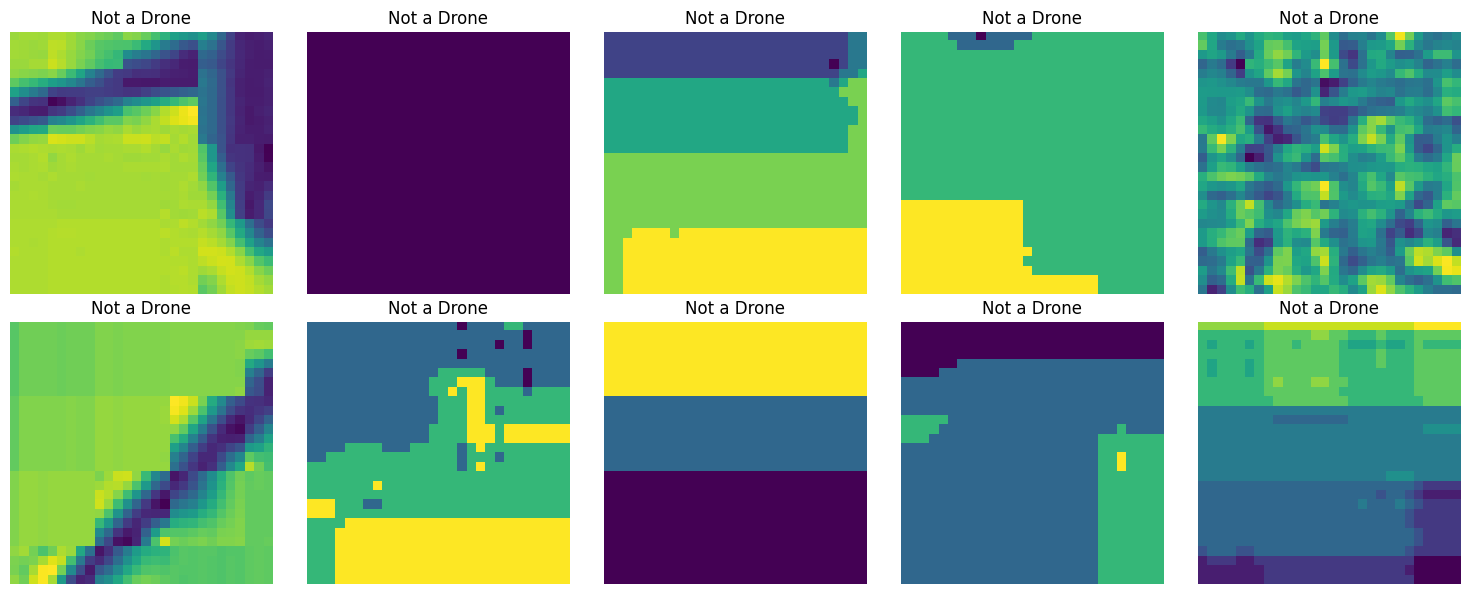

In [11]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the processed folder
processed_folder_path = '/content/processed_images_drones'  # Replace with your processed folder path

# Get a list of images from the processed folder
images_list = os.listdir(processed_folder_path)

# Select 10 random images
selected_images = random.sample(images_list, 10)

# Display the selected random images along with their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, img_name in enumerate(selected_images):
    img_path = os.path.join(processed_folder_path, img_name)
    img = Image.open(img_path)
    label = "Drone" if "1_" in img_name else "Not a Drone"
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Path to the processed folder
processed_folder_path = '/content/processed_images_not_drones'  # Replace with your processed folder path

# Get a list of images from the processed folder
images_list = os.listdir(processed_folder_path)

# Select 10 random images
selected_images = random.sample(images_list, 10)

# Display the selected random images along with their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, img_name in enumerate(selected_images):
    img_path = os.path.join(processed_folder_path, img_name)
    img = Image.open(img_path)
    label = "Drone" if "1_" in img_name else "Not a Drone"
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


thank you
Now please in another google colab cell, convert the folders of processed images and labels (the label is written in the file name. if the file name contains '1_' it is a drone) to TensorFlow datasets.
   - Ensure that the shapes and types of images and labels match TensorFlow's requirements.


In [15]:
import tensorflow as tf
from pathlib import Path

# Define the paths to your processed folders
processed_drones_folder = '/content/processed_images_drones'  # Replace with your processed drones folder path
processed_not_drones_folder = '/content/processed_images_not_drones'  # Replace with your processed not-drones folder path

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=1)  # Ensure grayscale images
    img = tf.image.convert_image_dtype(img, tf.float32)  # Convert image to float32
    img = tf.image.resize(img, (28, 28))  # Resize image to desired shape
    return img

# Function to extract label from image filename
def get_label(image_path):
    return 1 if tf.strings.regex_full_match(image_path, '.*1_.*') else 0

# Get the file paths for images
drones_image_paths = [str(path) for path in Path(processed_drones_folder).glob('*.jpg')]
not_drones_image_paths = [str(path) for path in Path(processed_not_drones_folder).glob('*.jpg')]

# Create TensorFlow datasets
drones_dataset = tf.data.Dataset.from_tensor_slices(drones_image_paths)
drones_dataset = drones_dataset.map(load_and_preprocess_image)
drones_dataset = drones_dataset.map(lambda x: (x, tf.constant(1)))  # Assign label 1 for drone images

not_drones_dataset = tf.data.Dataset.from_tensor_slices(not_drones_image_paths)
not_drones_dataset = not_drones_dataset.map(load_and_preprocess_image)
not_drones_dataset = not_drones_dataset.map(lambda x: (x, tf.constant(0)))  # Assign label 0 for not drone images

# Combine the datasets
combined_dataset = drones_dataset.concatenate(not_drones_dataset)

# Shuffle and batch the combined dataset
batch_size = 32
combined_dataset = combined_dataset.shuffle(buffer_size=len(drones_image_paths) + len(not_drones_image_paths))
combined_dataset = combined_dataset.batch(batch_size)

# Display dataset information
print("Dataset Information:")
print(combined_dataset.element_spec)


Dataset Information:
(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


could you print a few images from each folder to see the transformation to TensorFlow?

Visualizing Images from Drone Dataset:


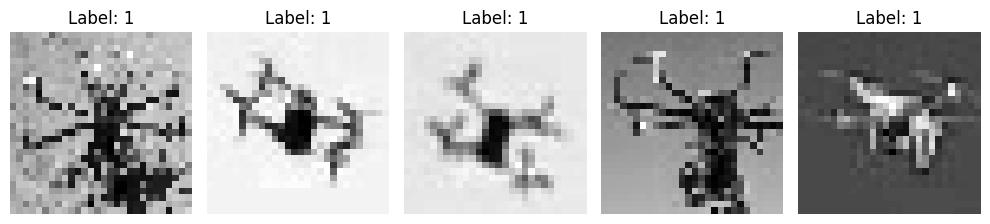

Visualizing Images from Not Drone Dataset:


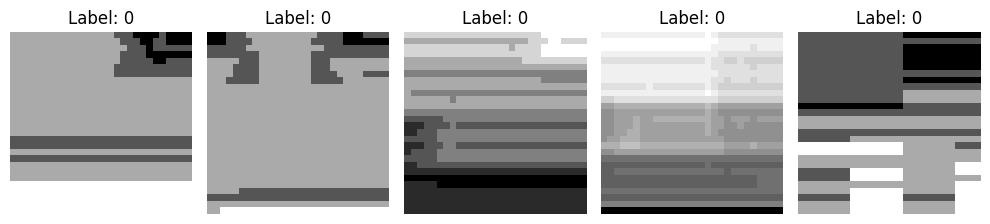

In [24]:
import matplotlib.pyplot as plt

# Function to visualize images from the dataset
def visualize_dataset(dataset, num_images=5):
    plt.figure(figsize=(10, 5))
    dataset_iter = iter(dataset)

    for i in range(num_images):
        image, label = next(dataset_iter)
        plt.subplot(2, num_images, i + 1)
        plt.imshow(image.numpy().squeeze(), cmap='gray')
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize images from drone dataset
print("Visualizing Images from Drone Dataset:")
visualize_dataset(drones_dataset)

# Visualize images from not-drone dataset
print("Visualizing Images from Not Drone Dataset:")
visualize_dataset(not_drones_dataset)



Thank you.
now we will build a classifier model using tensorflow. the model receives the combined dataset for tensorflow you created, output is classification of a num (0 or 1) as in the dataset (using the SoftMax function). Split the dataset into training and testing sets (80 training and 20 test).
Train the model on the training set and evaluate it on the test set.
   - Plot some images from the dataset to visually inspect the processed images.
   - Display the accuracy of the trained model on the test set.

In [26]:
#Step 1: Prepare the Dataset
total_samples = sum(1 for _ in combined_dataset)
train_size = int(0.8 * total_samples)
test_size = total_samples - train_size

train_dataset = combined_dataset.take(train_size)
test_dataset = combined_dataset.skip(train_size)


In [27]:
#Build and Train the model
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a 1D array
    tf.keras.layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    tf.keras.layers.Dense(2, activation='softmax')  # Output layer with 2 units for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(train_dataset, epochs=epochs)


Epoch 1/10
216/216 [==============================] - 4s 6ms/step - loss: 0.4780 - accuracy: 0.8041
Epoch 2/10
216/216 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8601
Epoch 3/10
216/216 [==============================] - 1s 3ms/step - loss: 0.3757 - accuracy: 0.8652
Epoch 4/10
216/216 [==============================] - 3s 6ms/step - loss: 0.3307 - accuracy: 0.8818
Epoch 5/10
216/216 [==============================] - 3s 6ms/step - loss: 0.2948 - accuracy: 0.8973
Epoch 6/10
216/216 [==============================] - 1s 3ms/step - loss: 0.2682 - accuracy: 0.9091
Epoch 7/10
216/216 [==============================] - 1s 3ms/step - loss: 0.2270 - accuracy: 0.9245
Epoch 8/10
216/216 [==============================] - 2s 7ms/step - loss: 0.2181 - accuracy: 0.9277
Epoch 9/10
216/216 [==============================] - 3s 6ms/step - loss: 0.2026 - accuracy: 0.9350
Epoch 10/10
216/216 [==============================] - 1s 4ms/step - loss: 0.1766 - accuracy: 0.9470

In [28]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


54/54 [==============================] - 1s 2ms/step - loss: 0.2666 - accuracy: 0.9432
Test Accuracy: 94.32%


Visualizing Images from Dataset:


TypeError: ignored

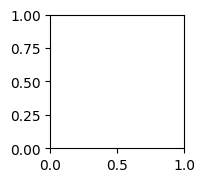

In [31]:
import matplotlib.pyplot as plt

# Function to visualize images from the dataset
def visualize_dataset(dataset, num_images=5):
    plt.figure(figsize=(10, 5))
    dataset_iter = iter(dataset)

    for i in range(num_images):
        image, label = next(dataset_iter)
        plt.subplot(2, num_images, i + 1)

        # Reshape or squeeze the image data if needed
        if len(image.shape) > 2:
            image = tf.squeeze(image)  # Remove single-dimensional entries from the shape
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize images from the dataset
print("Visualizing Images from Dataset:")
visualize_dataset(combined_dataset)
